# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, identify_low_variance_features, identify_missing_data

## Exploratory Data Analysis


In [42]:
# Read the data

songs_data = pd.read_csv("../data/songs_data.csv")

In [43]:
# View data first five rows

songs_data.head(n=5) 

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.70000,0.0974,0.641,125.000,248036
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.00000,0.0782,0.885,144.684,168160
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.04070,0.6110,0.439,99.993,271238
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.01040,0.3850,0.205,157.970,173347
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.00239,0.1700,0.382,162.721,168440


### Shape of data

In [44]:
print("Data Shape: ")
print(songs_data.shape)

Data Shape: 
(28396, 17)


### Indentifying Numerical and Non-Numerical Variables

In [45]:
# View the variables of the data and its type

songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

Note: There are four object type variables; Including the Target (genre)

In [46]:
# Identify the categorical features

categorical_cols = list(songs_data.select_dtypes(['object']).columns)
print("Categorical Features: ", categorical_cols)
print("")
print("number of categorical columns:", len(categorical_cols))

Categorical Features:  ['track_id', 'track_name', 'track_artist', 'genre']

number of categorical columns: 4


### Variance and correlation

In [47]:
# View statistics summary for the numerical data
# such as standard deviation or mean of each feature

songs_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [48]:
identify_low_variance_features(songs_data, std_threshold=0.01)

number of low variance features: 0
low variance features: []


c:\Users\oscar\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Desktop\Docs\7mo\Machine Learning\Project Machine Learning\machine-learning\machine-learning\src\helpers.py:135: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_df = pd.DataFrame(df.std()).rename(columns = {0: 'standard_deviation'})


[]

Note: features do not show low variance (under 0.01)

C:\Users\oscar\AppData\Local\Temp\ipykernel_16236\901022087.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(songs_data.corr(),annot=True, linewidth=2)


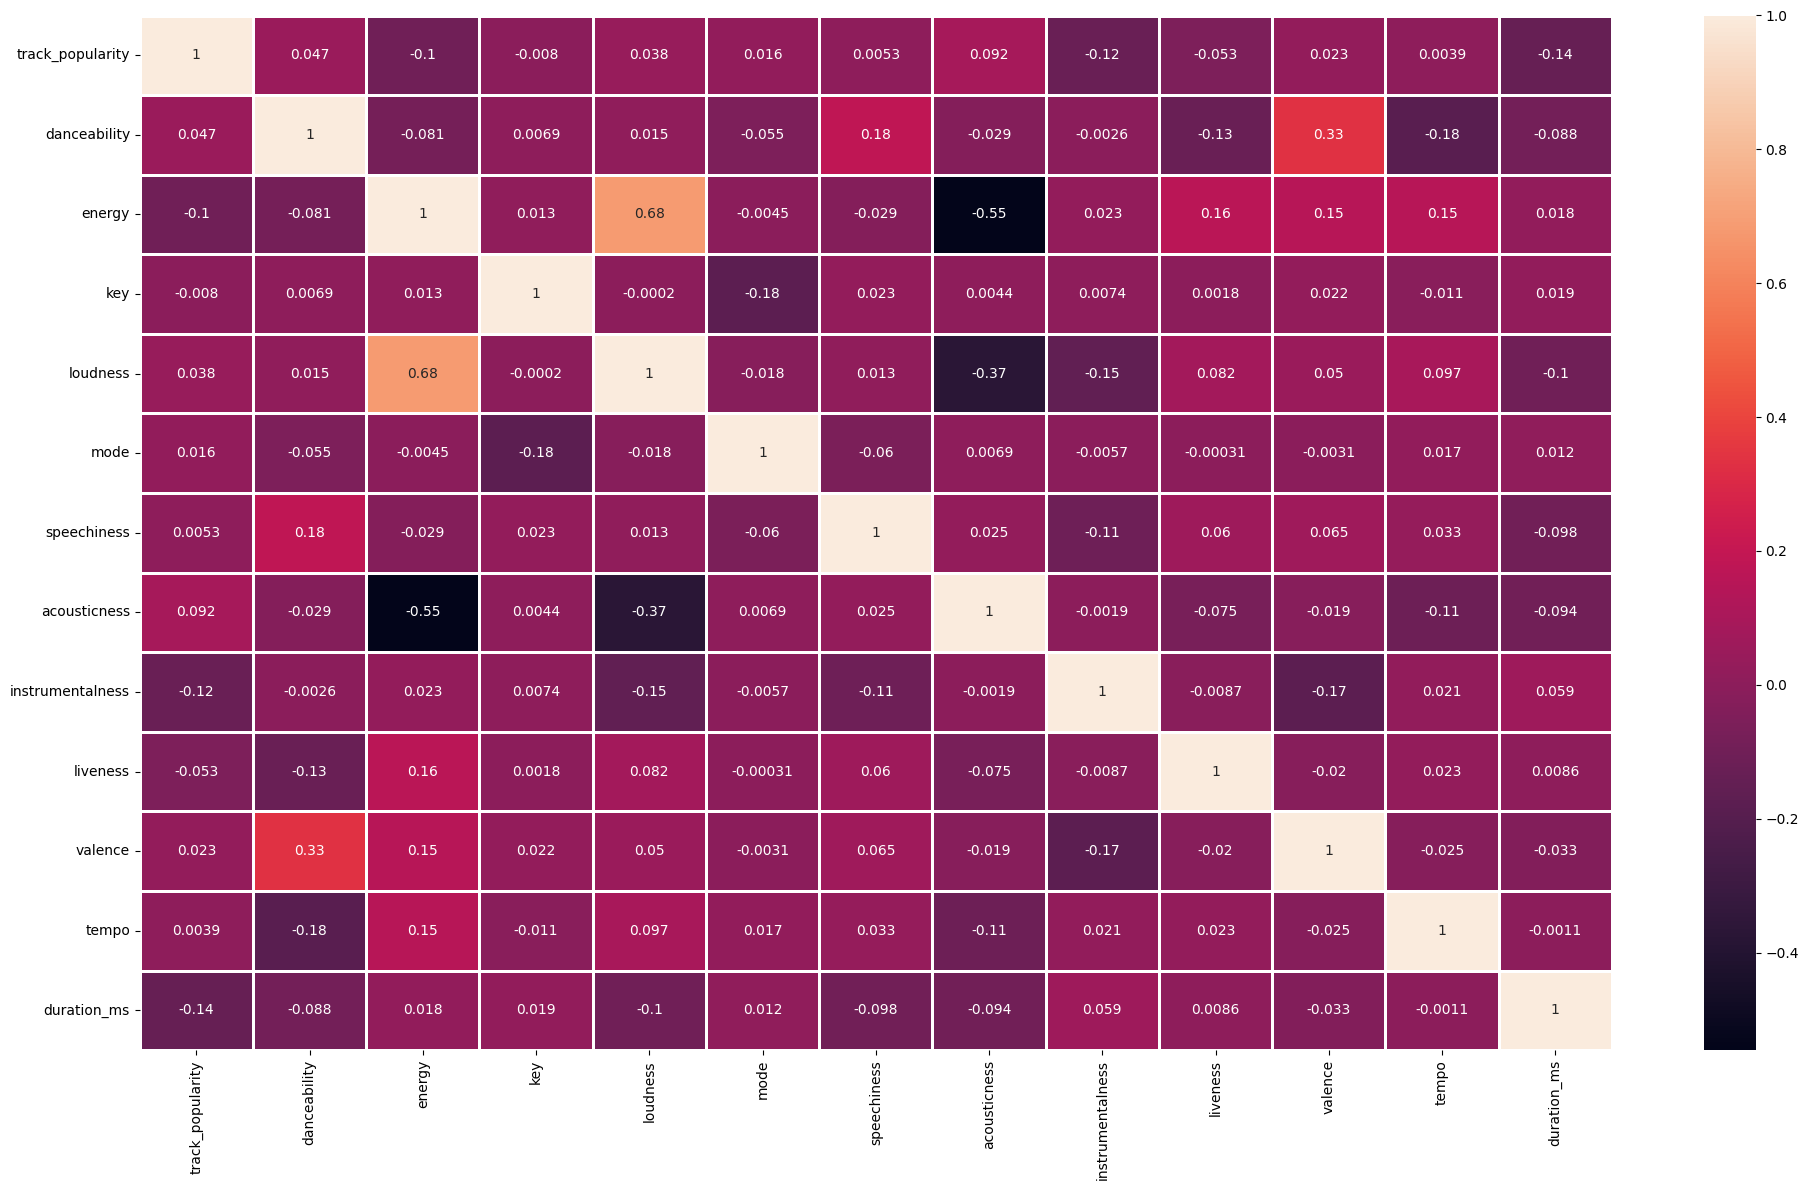

In [49]:
# Visualize correlation between features

plt.figure(figsize=(20,12))
sns.heatmap(songs_data.corr(),annot=True, linewidth=2)
plt.tight_layout()

In [50]:
# Identify Correlated Features

identify_highly_correlated_features(songs_data, correlation_threshold=0.75)

c:\Users\oscar\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Desktop\Docs\7mo\Machine Learning\Project Machine Learning\machine-learning\machine-learning\src\helpers.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs() # calculate the correlation matrix with


""


Note: There isn't any correlated features above 0.75

### Distribution

 check the distribution of the target
 
 Considering that the target is categorical, we can only look at the count 

<AxesSubplot: xlabel='genre', ylabel='Count'>

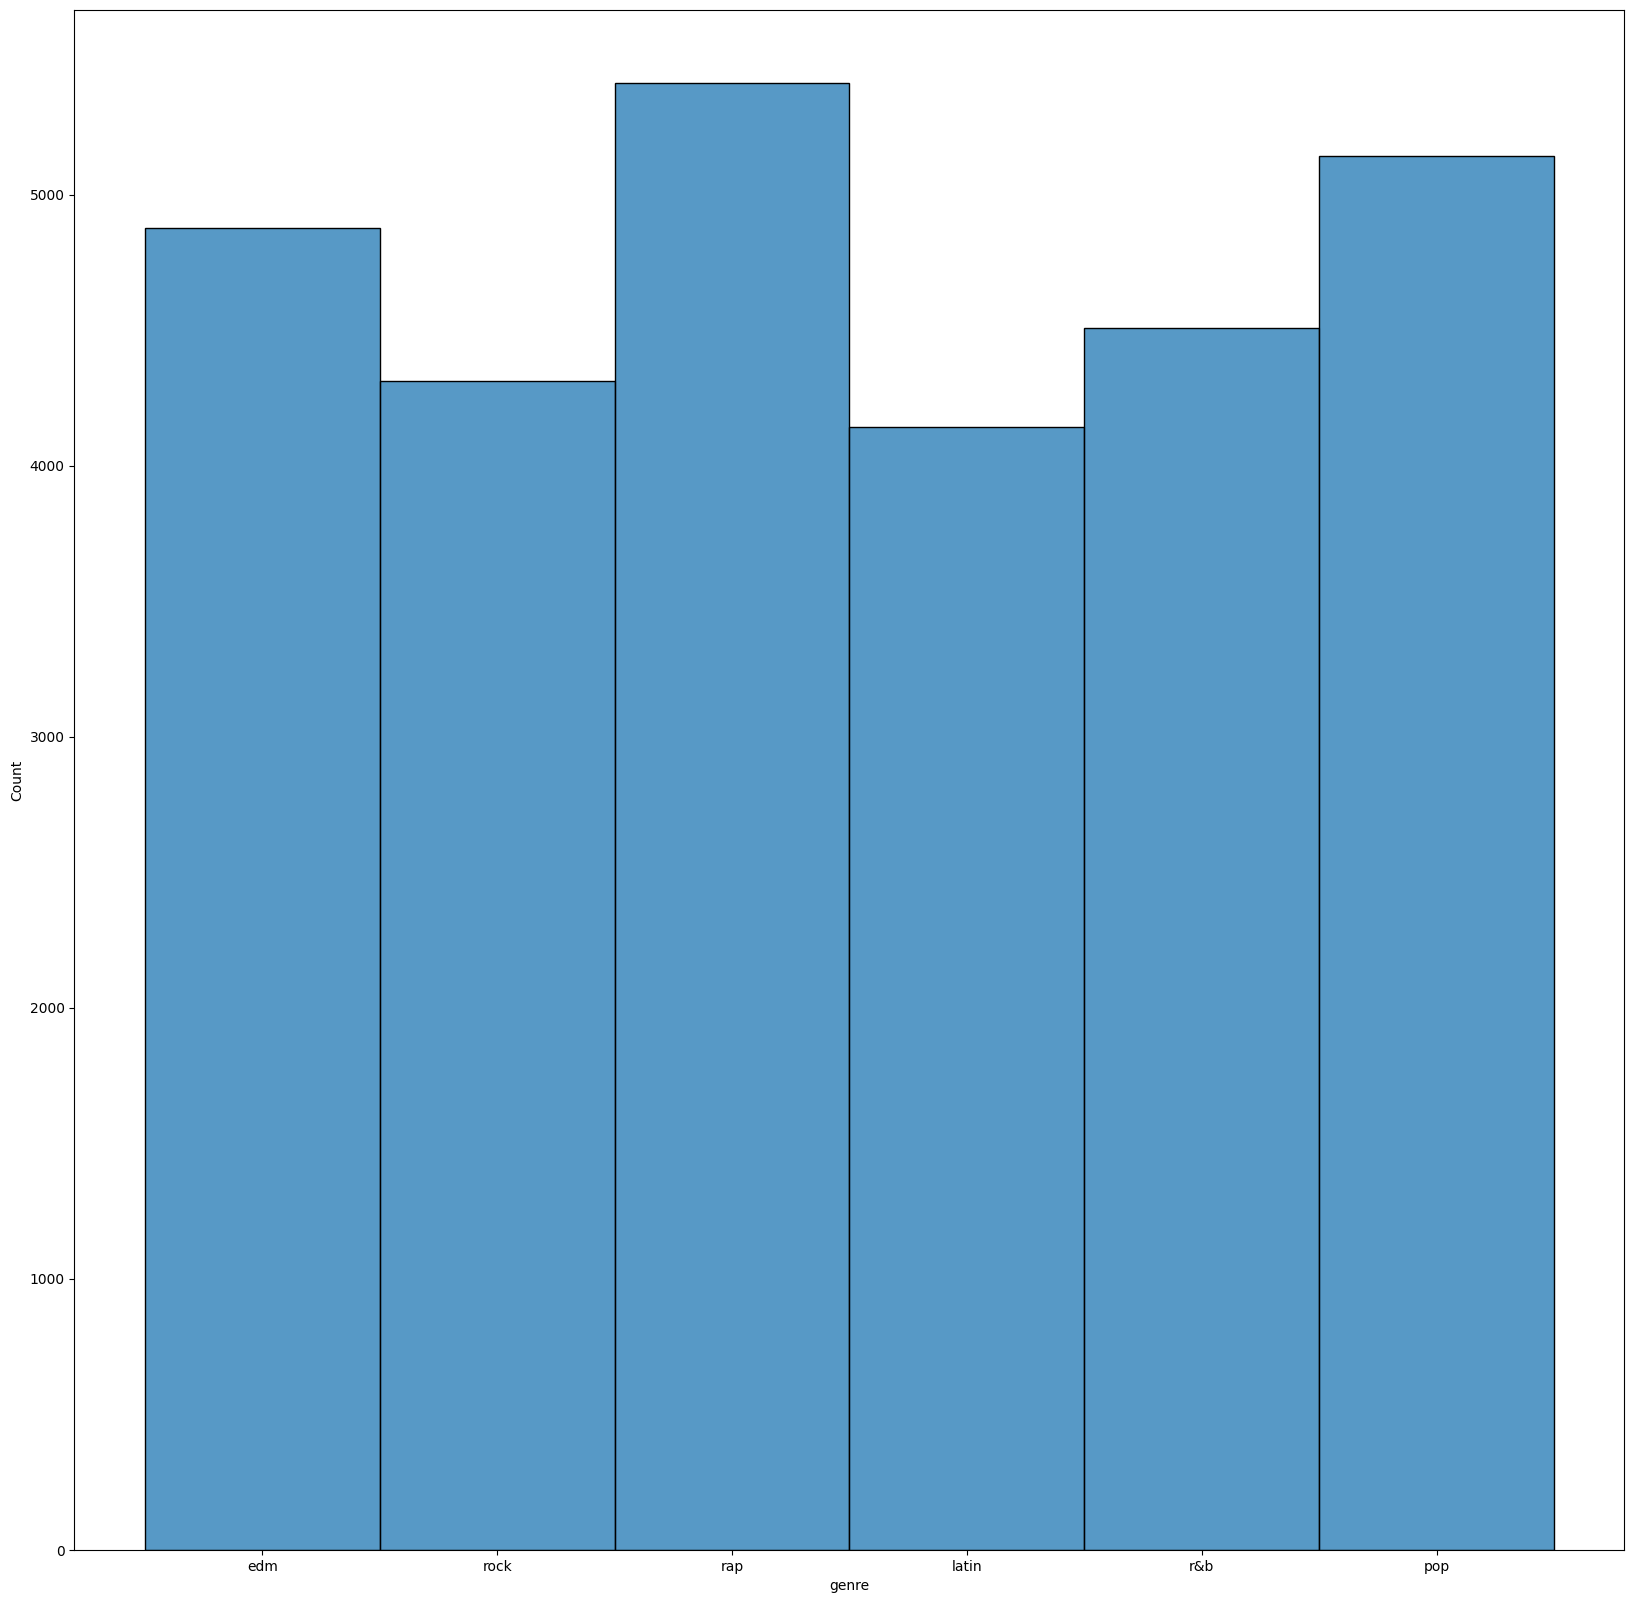

In [51]:
sns.histplot(data=songs_data.genre)


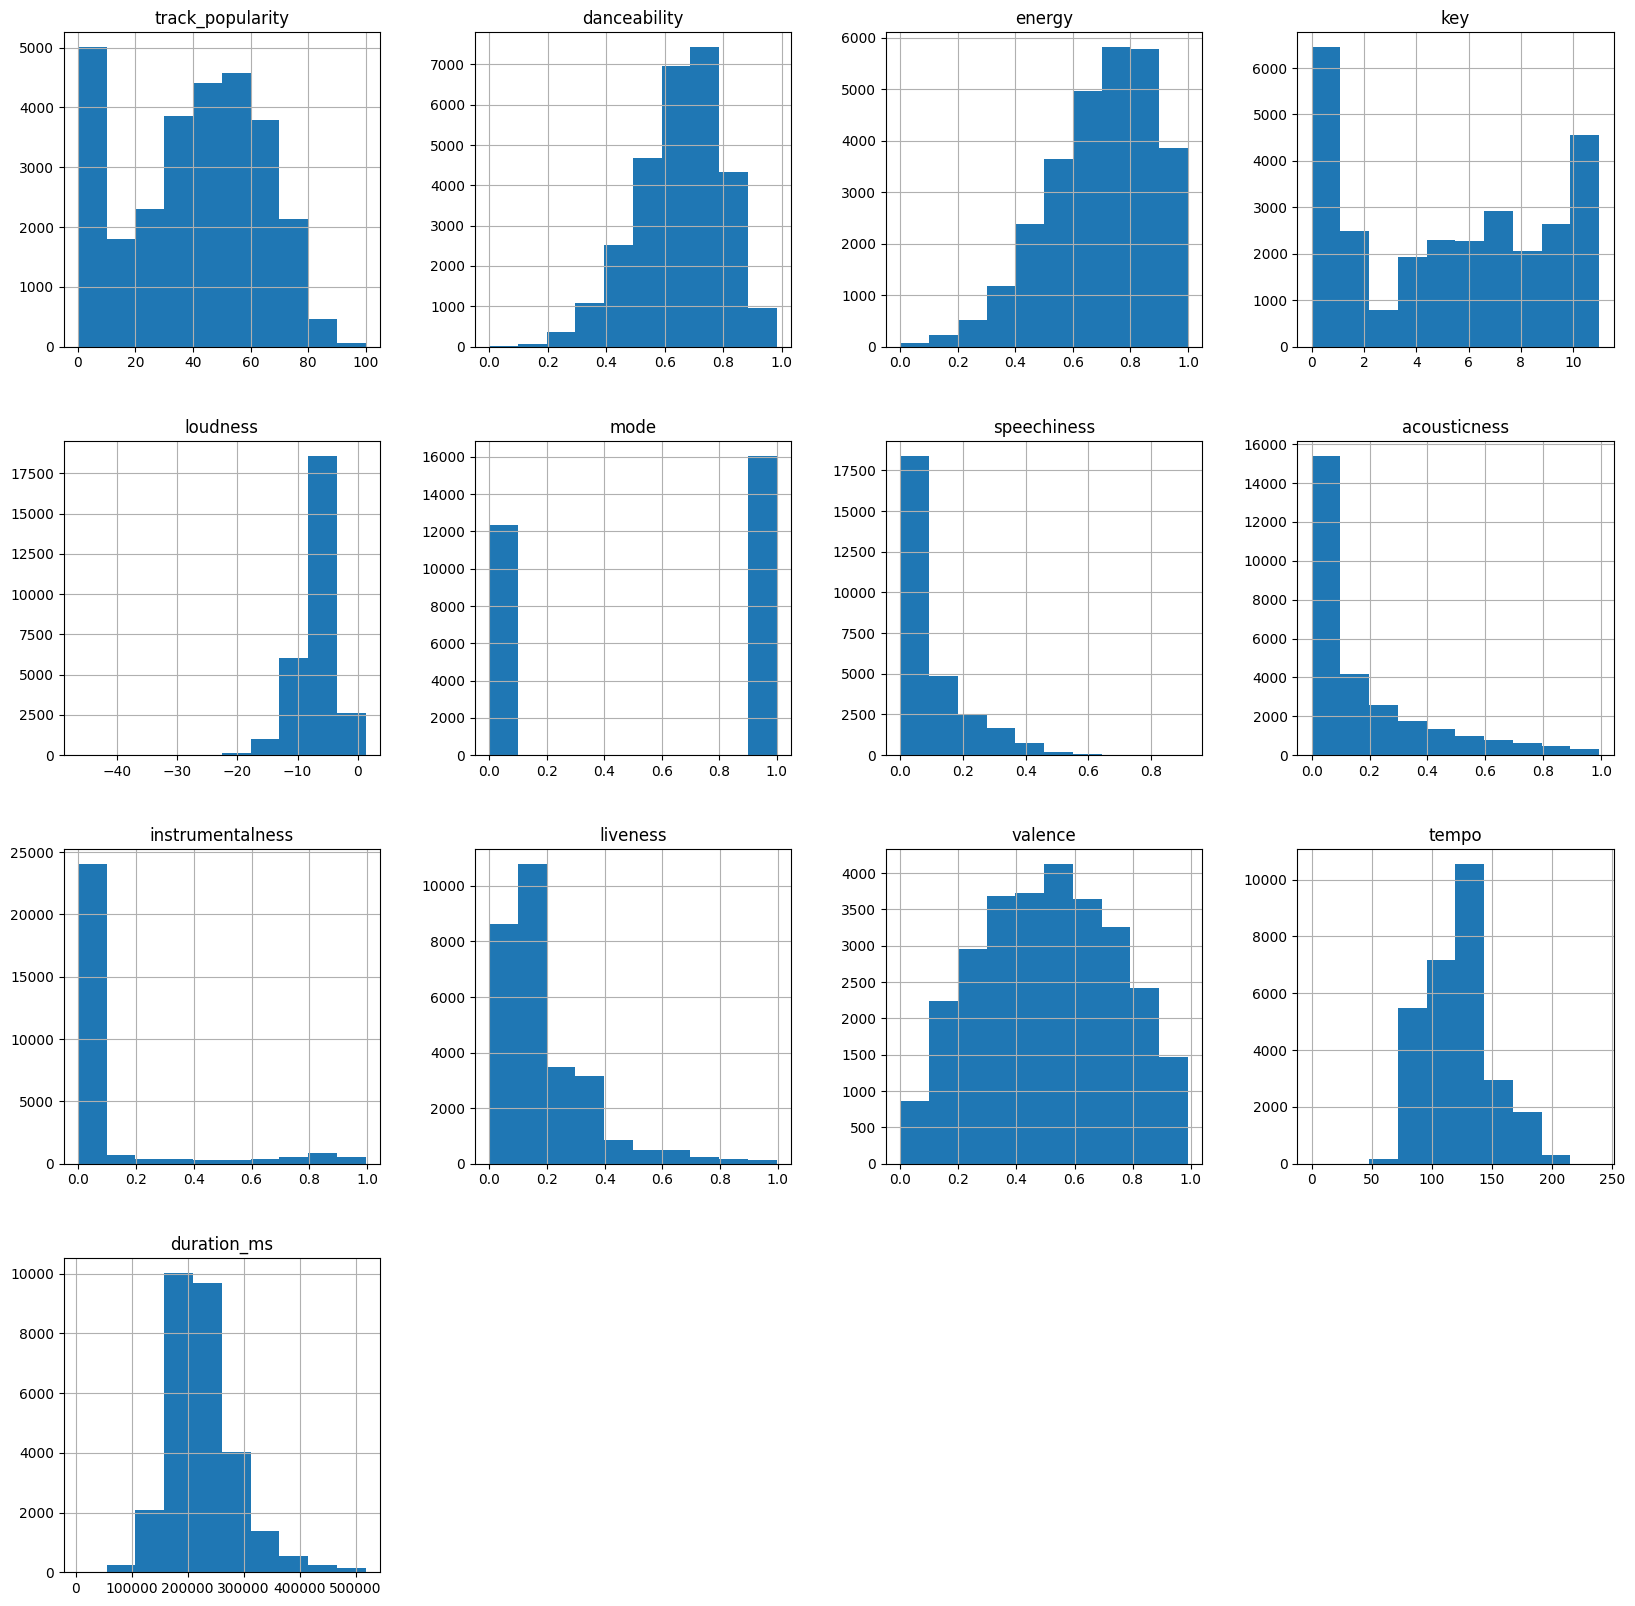

In [52]:
# Histograms of numerical variables

plt.rcParams["figure.figsize"] = (20,20)

songs_data.hist();

Note: we can observe that certain feature have a skew, while some present a normal distribution

### Missing data

In [53]:
# View features with missing data

identify_missing_data(songs_data)

,feature,percent_missing,data_type
0,track_artist,0.01,object
1,track_name,0.01,object


In [54]:
missing = identify_missing_data(songs_data)
print("# of features with missing values:", missing.shape[0])

# of features with missing values: 2


Note: There are 2 features with missing values

### Duplicate data 

In [55]:
# Identify duplicate data

songs_data[songs_data.duplicated(keep=False)]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1033,2CZFVWvkIatZGqHJ9IcpzE,Parachute,NSTASIA,37,r&b,0.814,0.4810,5,-6.448,0,0.1010,0.53000,0.000006,0.1290,0.573,119.008,188962
1326,4suDPyEfKYtqDR2OGblbTi,9と4分の3番線で君を待つ (Run Away) - Japanese Ver.,TOMORROW X TOGETHER,48,pop,0.630,0.7870,1,-4.302,1,0.1030,0.00489,0.000000,0.1340,0.466,128.997,211867
1483,6GbWNeR3P9MTCmSyPVHgb1,Taste,Rhye,58,pop,0.768,0.4290,1,-9.401,1,0.0955,0.87500,0.419000,0.1150,0.415,104.026,225600
1546,1BINQwBuKPKhpDyXipBXLl,Fly By Night,Rush,0,rock,0.495,0.7790,7,-6.678,1,0.0706,0.04570,0.000200,0.0813,0.545,139.076,201413
1744,5ceEaDSTtQR6HQ9yfEB6Sj,Yamamoto - KMN Street EP,Noah,40,rap,0.781,0.7050,7,-4.821,0,0.0974,0.37700,0.000000,0.1640,0.276,93.973,188936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27122,7DuLZ8HdkbJsFSIBJTYV9U,Grasshopper,Agnes Obel,35,pop,0.734,0.0772,2,-19.600,1,0.0544,0.84600,0.950000,0.0905,0.159,120.070,158360
27380,35rnikz5NAOTvdc4gYzJFN,Sieben,Subway To Sally,41,pop,0.453,0.9860,9,-1.853,0,0.1140,0.00354,0.000000,0.1770,0.284,161.928,206289
27911,2lWfuwRnN6aSk50TPx6eCk,If The World,Guns N' Roses,2,rock,0.645,0.7400,7,-9.414,1,0.0528,0.00542,0.023900,0.1150,0.783,146.434,293507
28132,4lqEFIB9YZl8BwR99L5H3b,In My Room (feat. Ty Dolla $ign & Tyga),Mustard,61,rap,0.745,0.8690,6,-4.375,1,0.0444,0.00193,0.000000,0.0799,0.814,104.015,168641


Note: 40 data points are duplicated

## Findings

- We count with data with the shape: 28396, 17
- 13 features are numerical, 3 features are categorical and the target is categorical
- Features do not show low variance (under 0.01)
- 2 features present a 1% missing data
- Most features present skew and not normal distribution
- There are 40 duplicate data
